In [2]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
# Constants
density_air = 0.856e-3 # g cm^-3
density_water = 1 # g cm^-3
density_mist = 1e-6 # g cm^-3
viscosity = 0.206 # cm^2 s^-1 This is the kinematic viscosity
g = 0.0981 #cm s^-2

In [4]:
# Parameters  
epsilon = (density_mist/density_water)/2
sigma = ((8/81)*(g**2/viscosity)*(density_water/density_air)**2)**(1/3)

Consider the raindrop's behaviour without the mist drag.

In [5]:
# Initial Conditions
init_radius = 0.01 # cm
init_velocity = 0 # cm s^-1
time_step  = 0.001
end_time = 10.

time_list = arange(0,end_time,time_step)
vel_list = empty_like(time_list) # Initially at rest
vel_list[0] = init_velocity

In [6]:
def f(velocity):
    return (g/(sigma**2*init_radius))*(1-(velocity/init_radius)**(3/2))


In [7]:
for index in range(1,vel_list.shape[0]):
    vel_list[index] = vel_list[index-1] + f(vel_list[index-1])*time_step

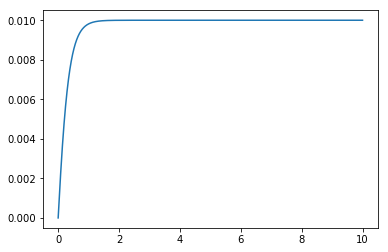

In [8]:
plot(time_list,vel_list)

In [38]:
def f(velocity,radius):
    return (g/(sigma**2*init_radius))*(1-(velocity/radius)**(3/2)) - 3*epsilon*velocity**2/radius
init_radius_list = linspace(0.01,0.11,11)
radius_list = empty((time_list.shape[0],init_radius_list.shape[0]))
radius_list[0] = init_radius_list
time_list = arange(0,end_time,time_step)
init_vel_list = np.zeros_like(init_radius_list)
vel_list = empty_like(radius_list) # Initially at rest
vel_list[0] = init_vel_list

In [39]:
for index in range(1,vel_list.shape[0]):
    vel_list[index,:] = vel_list[index-1,:] + f(vel_list[index-1,:],radius_list[index-1,:])*time_step
    radius_list[index,:] = radius_list[index-1,:] + epsilon*vel_list[index-1,:]*time_step

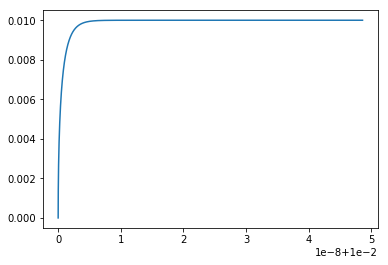

In [44]:
plot(radius_list[:,0],vel_list[:,0])




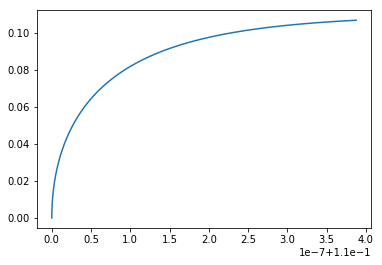

In [43]:
plot(radius_list[:,10],vel_list[:,10])

In [ ]:
radius_list